# Reading the data 

---

Lately, the _.fits_ data was transformed into _.csv_ and saved in database/csv_files. We are going to import a light curve sample and work with it.

In [14]:
FILE_PATH = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'

In [15]:
import pandas as pd

data_sample = pd.read_csv(FILE_PATH)
display(data_sample)

,DATE,WHITEFLUX
0,2007-05-16 18:10:55.071642,112626.77
1,2007-05-16 18:19:27.113766,112605.61
2,2007-05-16 18:27:59.155929,112771.50
3,2007-05-16 18:36:31.198092,113113.60
4,2007-05-16 18:45:03.240256,112621.79
...,...,...
23946,2007-10-05 19:08:02.358665,112438.61
23947,2007-10-05 19:16:34.313684,112406.01
23948,2007-10-05 19:25:06.268742,112496.13
23949,2007-10-05 19:33:38.223801,112344.83


In [16]:
import numpy as np

x = data_sample.DATE.to_numpy()
y = data_sample.WHITEFLUX.to_numpy()

# Ideal Lowpass Filters

---

Um filtro bi-dimensional passa-baixa que deixa passar todas as frequências em um círculo de raio $D_0$ a partir da origem e remove todas as frequências fora desse círculo é chamado de filtro passa-baixa ideal (ILPF) e é descrito como

$$ H(u) = \begin{cases}
   1, &\text{if } D(u) \le D_0 \\
   0, &\text{if } D(u) \ge D_0
\end{cases} 
$$

onde $D_0$ é uma constante positiva, e $D(u)$ é a distância entre um ponto $u$ até o centro do retângulo de frequência, ou seja, é definido por

$$ D(u) = (u-P/2) $$

sendo $P$ o tamanho do vetor original preenchido (padded).

O ponto de transição entre $H(u) = 1$ e $H(u) = 0$ é chamado de frequência de corte

In [ ]:
!pip install control
from tools import *

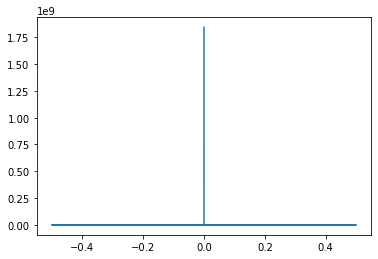

In [63]:
import matplotlib.pyplot as plt

fft = np.fft.fft(y, 2**14)
x_fft = np.fft.fftfreq(2**14)
#viz.view_lightcurve(x_fft, np.real(fft))

plt.plot(x_fft, np.real(fft))

In [7]:
def ideal_filter_array(array, cutoff_freq):
  n_time = len(array)
  D0 = cutoff_freq * n_time
  xc = n_time

  for i in range(len(array)):
    if array[i] > D0:
      array[i] = 0
    else:
      array[i] = 1  

  return array

In [12]:
y_filtered += (y.mean() - y_filtered.mean())

#viz.view_filter_results(x, y, x, filtered)
viz.view_lightcurve(x, y_filtered)

In [13]:
viz.view_lightcurve(x, y)

# Choosing the best Ideal Filter parameters

---

Since all the Mathematical and Computacional requirements have been prosecuted, we are going to summary all this on a single algorithm. On `filters` module, which belong to `tools` library, we have an object `FrequencyDomainFiltering` and it has the method `filter` that admits a parameter `filter_technique` and passing `ideal`, it makes all the signal pre-processing procedures, the filtering and the pos-processing for the Ideal Lowpass filter.